In [1]:
import sys
sys.path.append('/home/jannik/MA/fertige-MA/gitrepo')
from master_project import *

import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRSur7dq4Remnant fit.
Loaded NRSur7dq4 model


In [8]:
# fixed parameters
q = 1             # mass ratio
a = 0.8           # spin magnitude
chi2 = [0, 0, 0]  # non-spinning BH configuration
t_ref = -100      # reference time (default for NRSur7dq4Remnant)
n = 2**8          # sample number  

In [9]:
# load datafiles or generate new ones with the following cell
path = 'datafiles/dolphin'
thetas = np.loadtxt(path+'/theta_1')
phis = np.loadtxt(path+'/phi_1')
vs = np.loadtxt(path+'/vs')
max_asym = np.loadtxt(path+'/max_asym')

In [ ]:
# main loop (takes ~2 days)

vs = []
max_asym = []

for i in range(n**2): 
    
    # spinning BH configuration
    theta1 = thetas[i]
    phi1 = phis[i]

    chi1x = a * np.sin(theta1) * np.cos(phi1)
    chi1y = a * np.sin(theta1) * np.sin(phi1)
    chi1z = a * np.cos(theta1)
    chi1 = [chi1x, chi1y, chi1z]
    
    # NRSur7dq4Remnant kick velocity in km/s
    vf, vf_err = fit.vf(q, chi1, chi2) 
    v = np.linalg.norm(vf)*3*10**5
    vs.append(v)

    # NRSur7dq4 (2,2) maximum of copr antisym waveform ampl
    f_ref = get_f_ref(q, chi1, chi2, t_ref)
    t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
    h_copr = modes_from_iner_to_new_frame(t, h_iner, 'coprecessing')
    max_copr_22_asym = np.max(ampl_asym(h_copr, 2, 2))
    max_asym.append(max_copr_22_asym)
    
#np.savetxt('theta_1',thetas , delimiter=',')
#np.savetxt('phi_1',phis , delimiter=',')
#np.savetxt('vs', vs , delimiter=',')
#np.savetxt('max_asym', max_asym , delimiter=',')

## Dolphin with $\Delta v$ 

In [10]:
# get delta v and average chi^perp for many vertical lines

Delta_v = []
chi_perp = []
phi_dv = []

vs = np.array(vs)
max_asym = np.array(max_asym)

epsilon = 0.005
start = 0
end = 0.065
n_lines = 2**10
dasym = (end - start) / n_lines
const_asym_lines = np.linspace(start, end, n_lines)

for const_asym in const_asym_lines:
    
    bool_indices_bigger = max_asym >= const_asym - epsilon
    bool_indices_smaller = max_asym <= const_asym + epsilon
    bool_indices = bool_indices_bigger & bool_indices_smaller
    valid_indices = np.array(range(n**2))[bool_indices]
    
    dv = np.max(vs[valid_indices]) - np.min(vs[valid_indices])
    Delta_v.append(dv)
    
    chi_p = np.sin(thetas[valid_indices])*a
    chi_p = np.mean(chi_p)
    chi_perp.append(chi_p)
    
    phi_dv.append(phis)
    

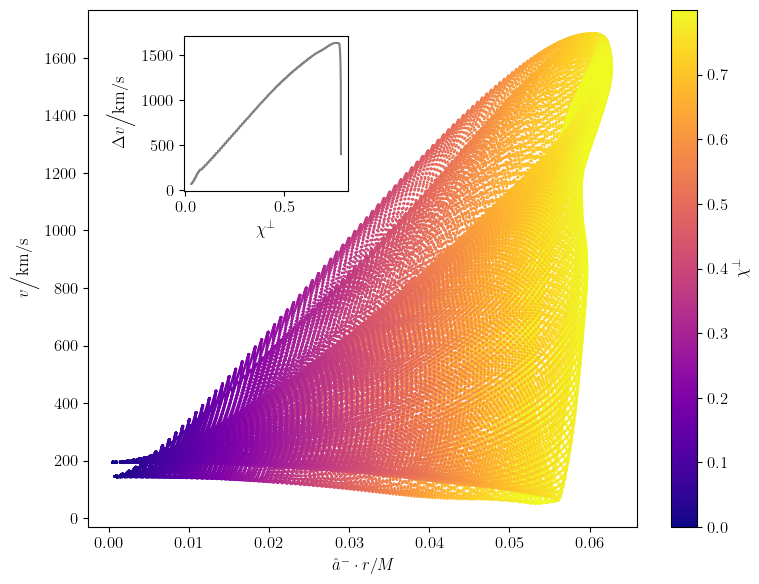

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
axins = ax1.inset_axes([0.175, 0.65, 0.3, 0.3])

dim3 = np.sin(np.array(thetas))*a #np.array(random_angles)[:,0]

im = ax1.scatter(max_asym, vs, c=dim3, cmap='plasma', s=1, rasterized=True) # 'plasma' non-cyclic
ax1.set_xlabel(r'$\hat{a}^-\cdot r/M$')
ax1.set_ylabel(r'$v\Big/$km/s')
#ax1.axvline(asym_boarder, color='grey')
#ax1.axhline(v_boarder, color='grey')
#ax1.set_xlim(-200,100)
cbar = fig.colorbar(im,)
cbar.set_label(r'$\chi^\perp$')

axins.plot(chi_perp, Delta_v, color='grey')
axins.set_ylabel(r'$\Delta v\Big/$km/s')
axins.set_xlabel(r'$\chi^\perp$')

fig.tight_layout()
#fig.savefig('dolphin_chi_perp.pdf')
plt.show()

## Constant asymmetry Plots (vertical line)

In [11]:
size = 22

params = {'xtick.labelsize' : size, 
          'ytick.labelsize' : size, 
          'axes.labelsize' : size, 
          'legend.fontsize' : size, 
          'font.size' : size,
          'axes.titlesize': size
         }
plt.rcParams.update(params)

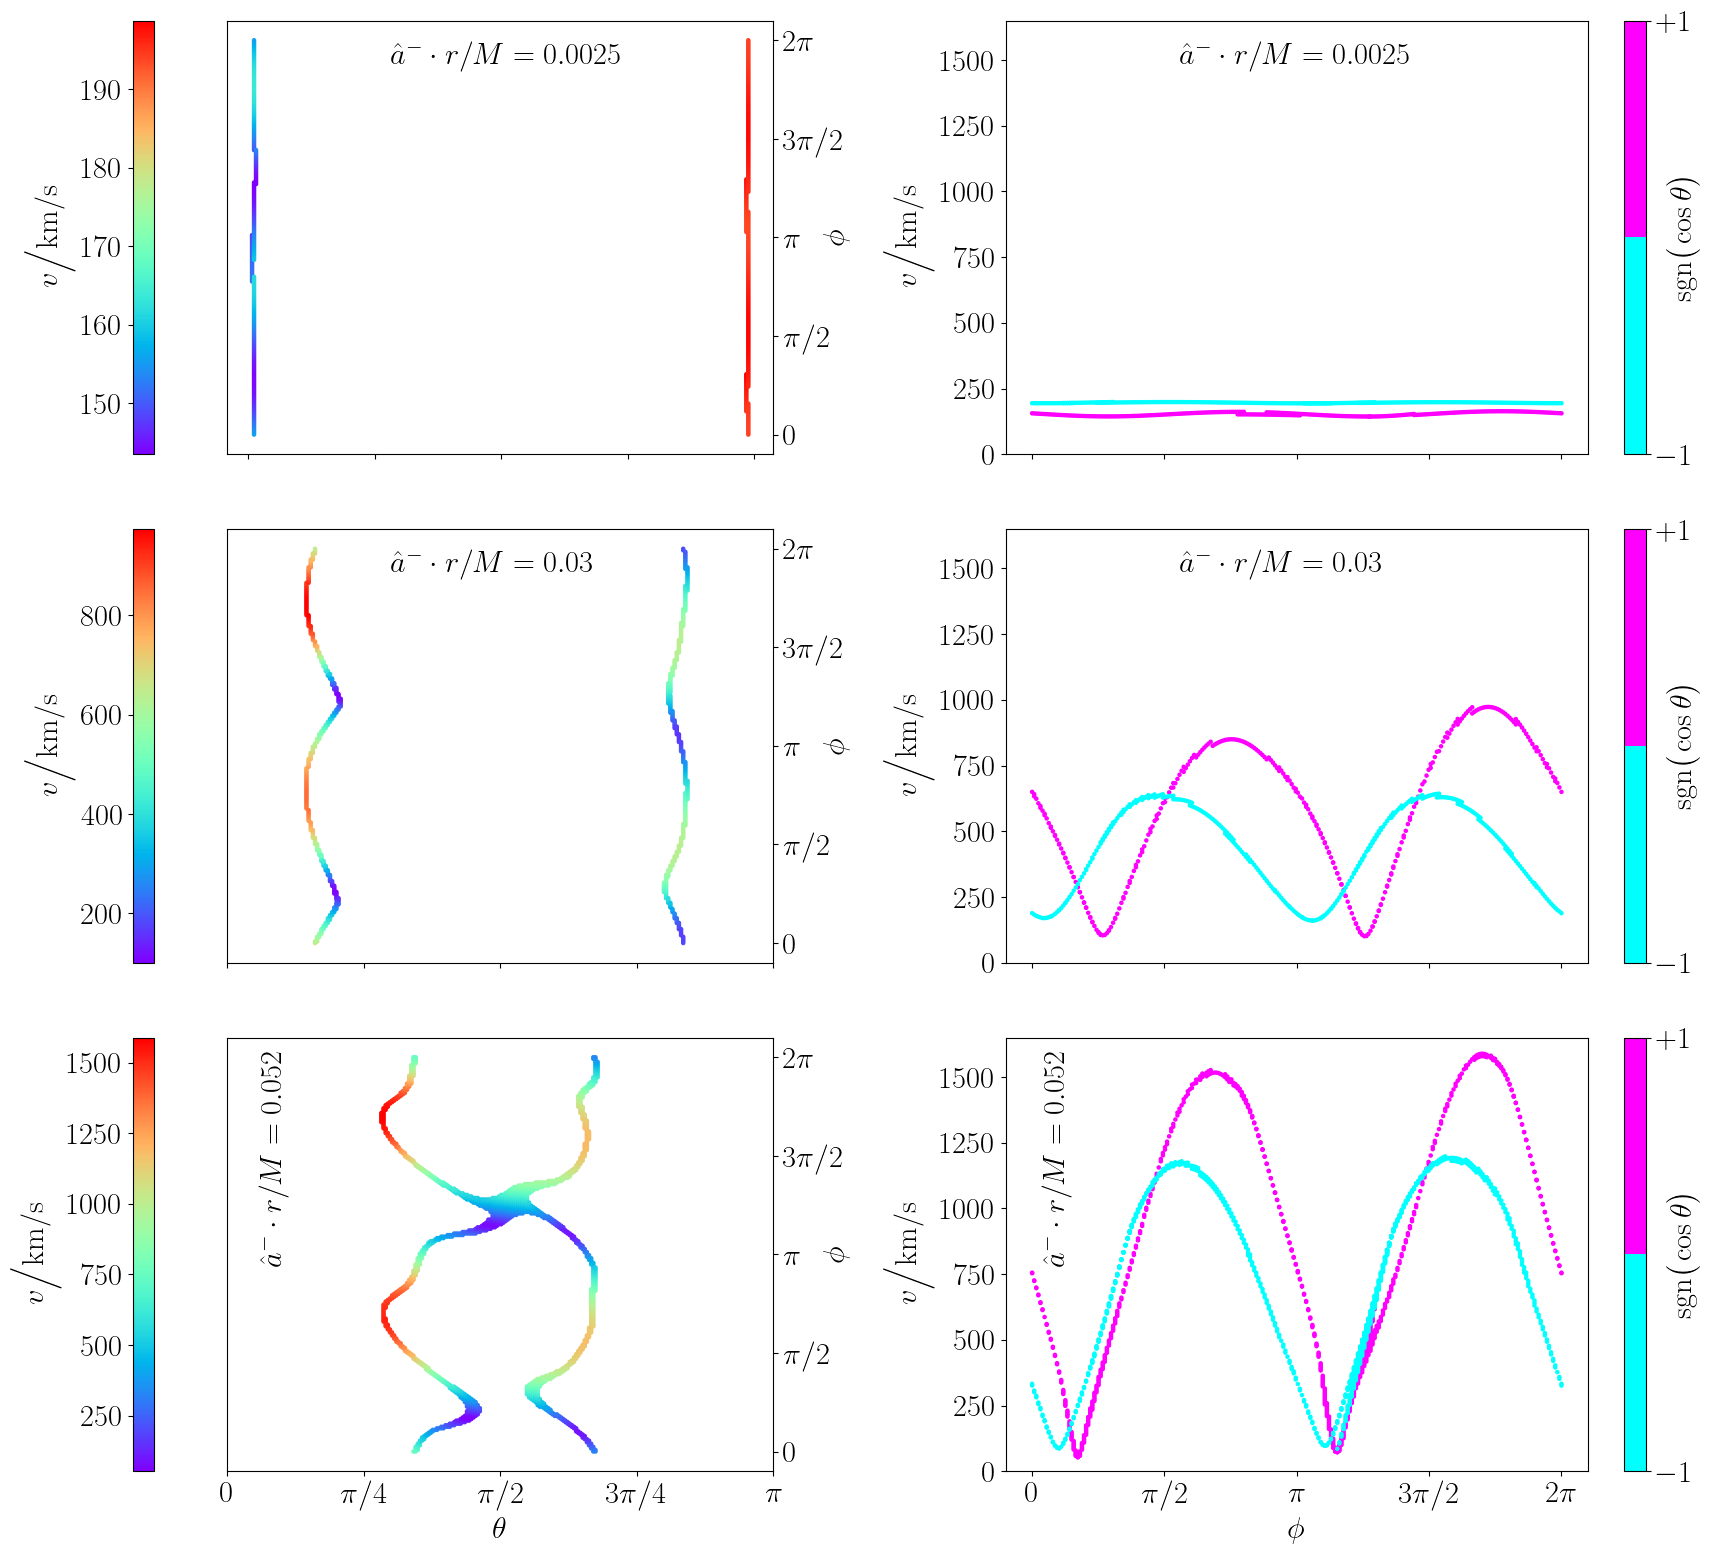

In [26]:
epsilon = 0.00037

# small asym
const_asym_small = 0.0025
bool_indices_bigger = np.array(max_asym) >= const_asym_small - epsilon
bool_indices_smaller = np.array(max_asym) <= const_asym_small + epsilon
bool_indices = bool_indices_bigger & bool_indices_smaller
valid_indices_small = np.array(range(n**2))[bool_indices]

# medium asym
const_asym_medium = 0.03
bool_indices_bigger = np.array(max_asym) >= const_asym_medium - epsilon
bool_indices_smaller = np.array(max_asym) <= const_asym_medium + epsilon
bool_indices = bool_indices_bigger & bool_indices_smaller
valid_indices_medium = np.array(range(n**2))[bool_indices]

# high asym
const_asym_high = 0.052
bool_indices_bigger = np.array(max_asym) >= const_asym_high - epsilon
bool_indices_smaller = np.array(max_asym) <= const_asym_high + epsilon
bool_indices = bool_indices_bigger & bool_indices_smaller
valid_indices_high = np.array(range(n**2))[bool_indices]

# 6 plots
fig = plt.figure(figsize=(18,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

#subfig1, subfig2, subfig3 = fig.subfigures(nrows=3, ncols=1)
#ax1, ax2 = subfig1.subplots(nrows=1, ncols=2)
#ax3, ax4 = subfig2.subplots(nrows=1, ncols=2)
#ax5, ax6 = subfig3.subplots(nrows=1, ncols=2)
#subfig1.suptitle(r'$\hat{a}^-\cdot r/M = %s$' %const_asym_small, fontsize=20, y=1.015)
#subfig2.suptitle(r'$\hat{a}^-\cdot r/M = %s$' %const_asym_medium, fontsize=20, y=1.015)
#subfig3.suptitle(r'$\hat{a}^-\cdot r/M = %s$' %const_asym_high, fontsize=20, y=1.015)

# right colormap
cmap = plt.cm.get_cmap('cool', 2)

# 1. Plot
dim3=np.array(vs)[valid_indices_small]
im = ax1.scatter(np.array(thetas)[valid_indices_small], np.array(phis)[valid_indices_small], 
                 c=dim3, cmap='rainbow', s=5)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_ylabel('$\phi$',labelpad=-15)
ax1.tick_params('x', labelbottom=False)
ax1.set_xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
ax1.set_yticks(np.arange(0, 2*np.pi+np.pi/2, step=(np.pi/2)), ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
cbar = fig.colorbar(im, location='left')
cbar.set_label(r'$v\Big/$km/s') 
ax1.text(0.3, 0.9, r'$\hat{a}^-\cdot r/M = %s$' %const_asym_small, transform = ax1.transAxes)

# 2. Plot
dim3 = np.sign(np.cos(np.array(thetas)[valid_indices_small]))
im = ax2.scatter(np.array(phis)[valid_indices_small], np.array(vs)[valid_indices_small], c=dim3, cmap=cmap, s=5)
#ax2.set_xlabel(r'$\phi$')
ax2.set_ylabel(r'$v\Big/$km/s')
ax2.set_xticks(np.arange(0, 2*np.pi+np.pi/2, step=(np.pi/2)), ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
cbar = fig.colorbar(im, ticks=[-1,1], format=mticker.FixedFormatter([r'$-1$', r'$+1$']))
cbar.set_label(r'sgn$\big(\cos\theta\big)$', labelpad=-20)
ax2.tick_params('x', labelbottom=False)
ax2.set_ylim(0,1650)
ax2.text(0.3, 0.9, r'$\hat{a}^-\cdot r/M = %s$' %const_asym_small, transform = ax2.transAxes)

# 3. Plot
dim3=np.array(vs)[valid_indices_medium]
im = ax3.scatter(np.array(thetas)[valid_indices_medium], np.array(phis)[valid_indices_medium], 
                 c=dim3, cmap='rainbow', s=5)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax3.set_ylabel('$\phi$',labelpad=-15)
ax3.tick_params('x', labelbottom=False)
ax3.set_xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
ax3.set_yticks(np.arange(0, 2*np.pi+np.pi/2, step=(np.pi/2)), ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
cbar = fig.colorbar(im, location='left')
cbar.set_label(r'$v\Big/$km/s')
ax3.text(0.3, 0.9, r'$\hat{a}^-\cdot r/M = %s$' %const_asym_medium, transform = ax3.transAxes)

# 4. Plot
dim3 = np.sign(np.cos(np.array(thetas)[valid_indices_medium]))
im = ax4.scatter(np.array(phis)[valid_indices_medium], np.array(vs)[valid_indices_medium], c=dim3, cmap=cmap, s=5)
#ax4.set_xlabel(r'$\phi$')
ax4.set_ylabel(r'$v\Big/$km/s')
ax4.set_xticks(np.arange(0, 2*np.pi+np.pi/2, step=(np.pi/2)), ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
cbar = fig.colorbar(im, ticks=[-1,1], format=mticker.FixedFormatter([r'$-1$', r'$+1$']))
cbar.set_label(r'sgn$\big(\cos\theta\big)$', labelpad=-20)
ax4.tick_params('x', labelbottom=False)
ax4.set_ylim(0,1650)
ax4.text(0.3, 0.9, r'$\hat{a}^-\cdot r/M = %s$' %const_asym_medium, transform = ax4.transAxes)

# 5. Plot
dim3=np.array(vs)[valid_indices_high]
im = ax5.scatter(np.array(thetas)[valid_indices_high], np.array(phis)[valid_indices_high], 
                 c=dim3, cmap='rainbow', s=5)
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position("right")
ax5.set_xlabel(r'$\theta$')
ax5.set_ylabel('$\phi$',labelpad=-15)
ax5.set_xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
ax5.set_yticks(np.arange(0, 2*np.pi+np.pi/2, step=(np.pi/2)), ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
cbar = fig.colorbar(im, location='left')
cbar.set_label(r'$v\Big/$km/s')
ax5.text(0.1, 0.47, r'$\hat{a}^-\cdot r/M = %s$' %const_asym_high, 
         rotation_mode='anchor', rotation=90, transform = ax5.transAxes)

# 6. Plot
dim3 = np.sign(np.cos(np.array(thetas)[valid_indices_high]))
im = ax6.scatter(np.array(phis)[valid_indices_high], np.array(vs)[valid_indices_high], c=dim3, cmap=cmap, s=5)
ax6.set_xlabel(r'$\phi$')
ax6.set_ylabel(r'$v\Big/$km/s')
ax6.set_xticks(np.arange(0, 2*np.pi+np.pi/2, step=(np.pi/2)), ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
ax6.set_ylim(0,1650)
cbar = fig.colorbar(im, ticks=[-1,1], format=mticker.FixedFormatter([r'$-1$', r'$+1$']))
cbar.set_label(r'sgn$\big(\cos\theta\big)$', labelpad=-20)
ax6.text(0.1, 0.47, r'$\hat{a}^-\cdot r/M = %s$' %const_asym_high, 
         rotation_mode='anchor', rotation=90, transform = ax6.transAxes)

#fig.subplots_adjust(hspace=-5, wspace=.4)
fig.tight_layout()
#fig.savefig('const_asym.pdf', bbox_inches='tight')
plt.show()

## Constant $\phi$

In [8]:
size = 22

params = {'xtick.labelsize' : size, 
          'ytick.labelsize' : size, 
          'axes.labelsize' : size, 
          'legend.fontsize' : size, 
          'font.size' : size,
          'axes.titlesize': size
         }
plt.rcParams.update(params)

/tmp/ipykernel_7512/916626663.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


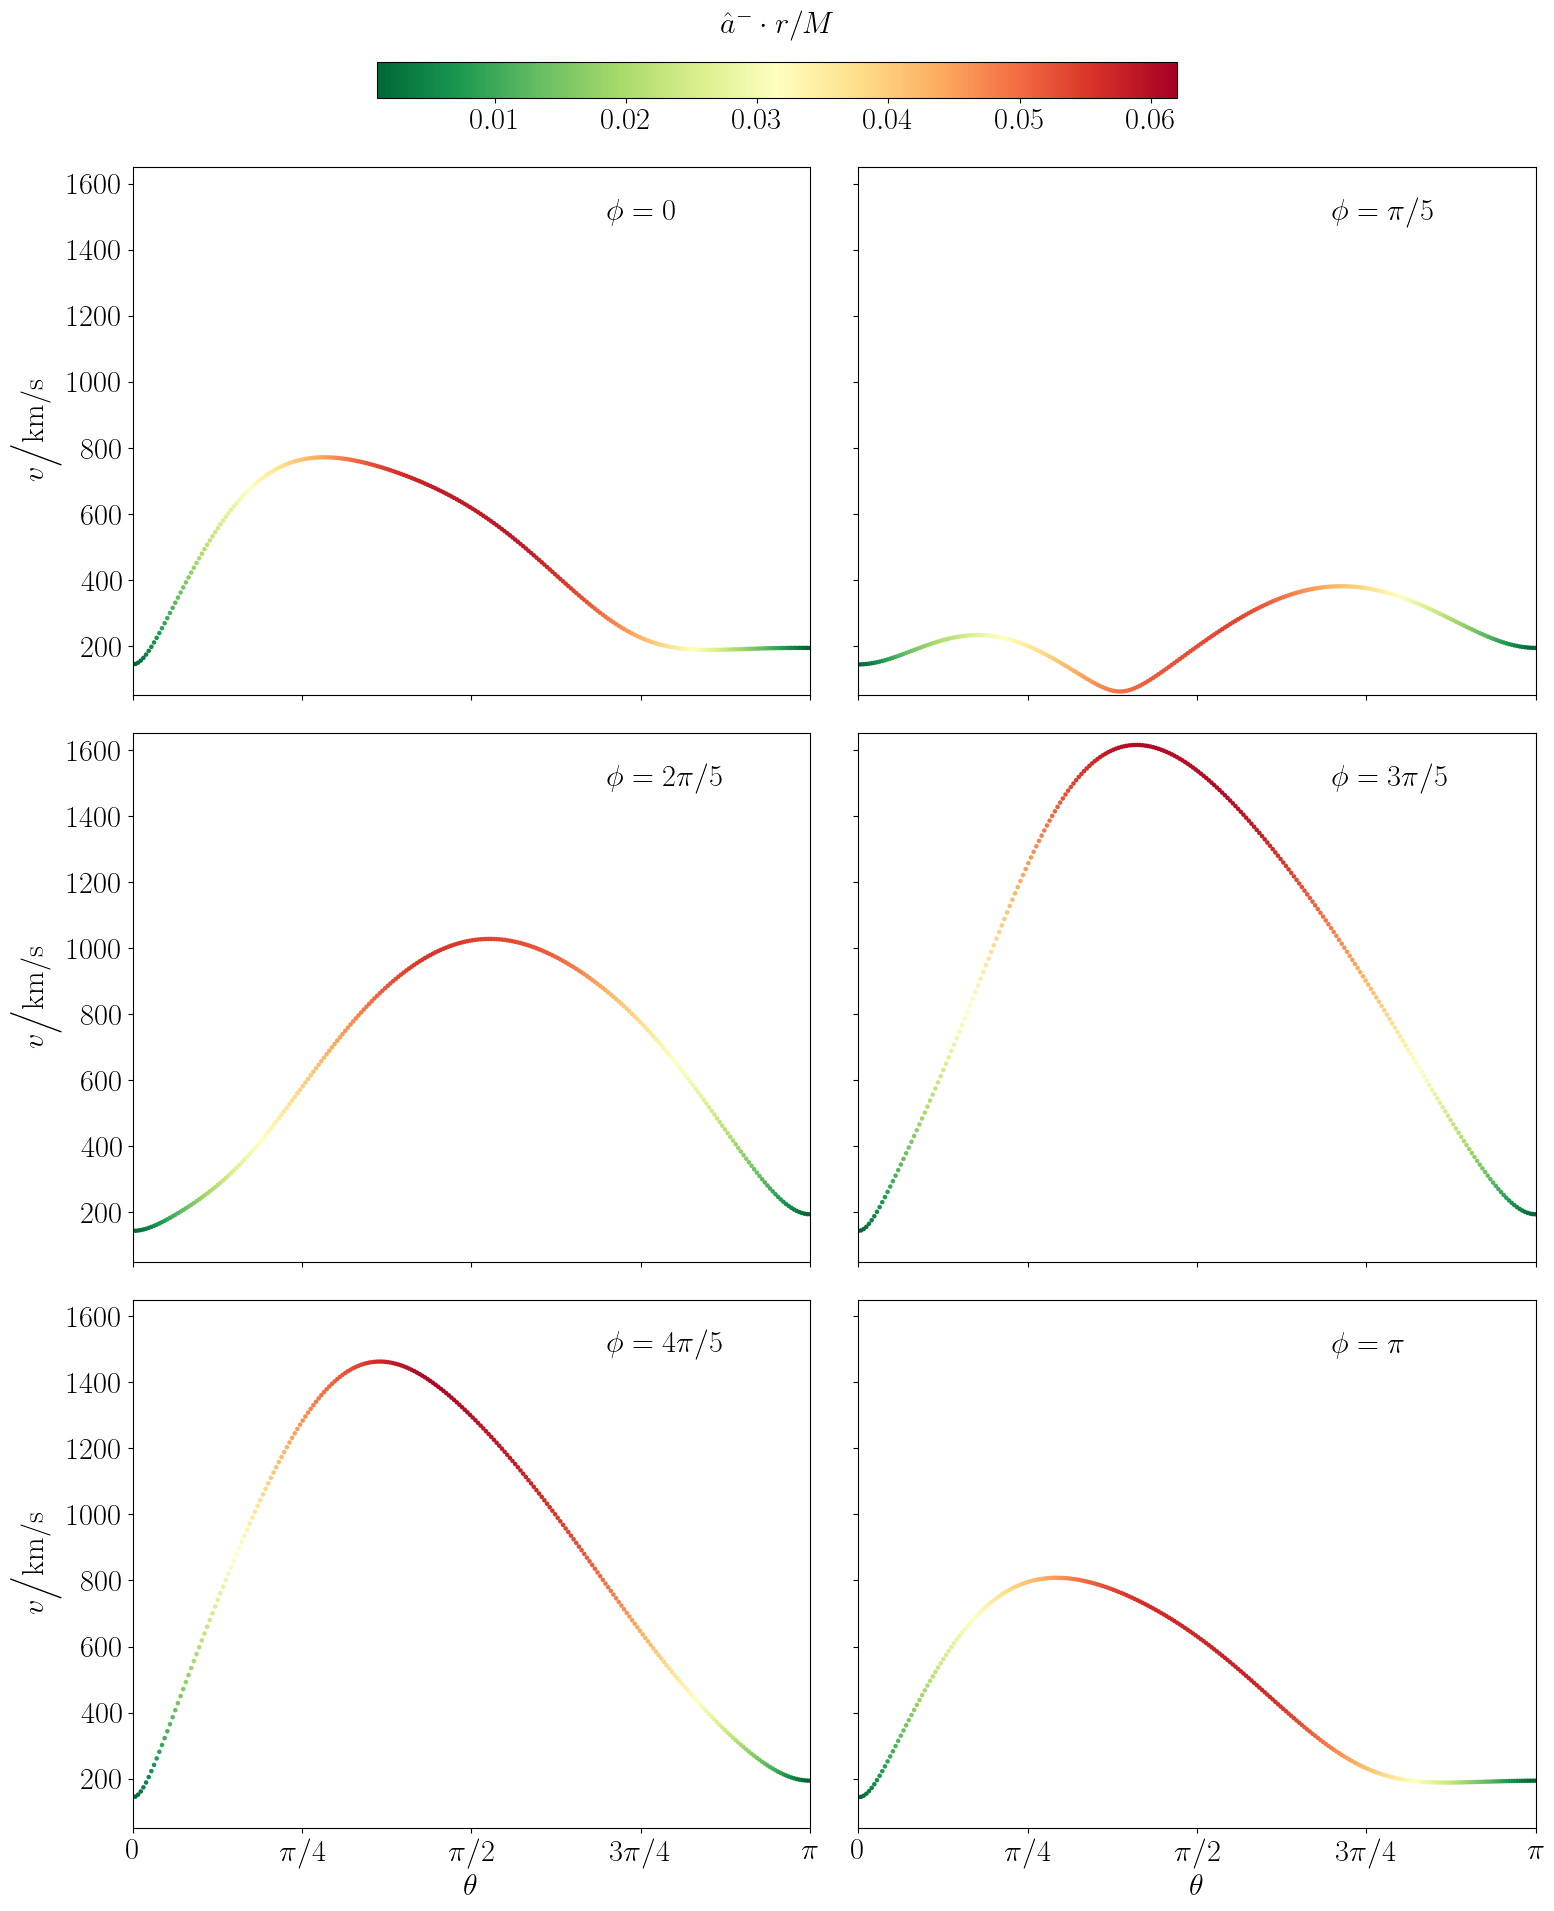

In [30]:
# y-limits
yliml, ylimu = 50, 1650

# width of lines
epsilon = 0.0125

# case 1
const_phi = 0
bool_indices_bigger = np.array(phis) >= const_phi - epsilon
bool_indices_kleiner = np.array(phis) <= const_phi + epsilon
bool_indices = bool_indices_bigger & bool_indices_kleiner
valid_indices = np.array(range(n**2))[bool_indices]

# case 2
const_phi_2 = np.pi/5
bool_indices_bigger = np.array(phis) >= const_phi_2 - epsilon
bool_indices_kleiner = np.array(phis) <= const_phi_2 + epsilon -0.001
bool_indices = bool_indices_bigger & bool_indices_kleiner
valid_indices_2 = np.array(range(n**2))[bool_indices]

# case 3
const_phi_3 = 2*np.pi/5
bool_indices_bigger = np.array(phis) >= const_phi_3 - epsilon
bool_indices_kleiner = np.array(phis) <= const_phi_3 + epsilon 
bool_indices = bool_indices_bigger & bool_indices_kleiner
valid_indices_3 = np.array(range(n**2))[bool_indices]

# case 4
const_phi_4 = 3*np.pi/5
bool_indices_bigger = np.array(phis) >= const_phi_4 - epsilon
bool_indices_kleiner = np.array(phis) <= const_phi_4 + epsilon -0.001
bool_indices = bool_indices_bigger & bool_indices_kleiner
valid_indices_4 = np.array(range(n**2))[bool_indices]

# case 5
const_phi_5 = 4*np.pi/5
bool_indices_bigger = np.array(phis) >= const_phi_5 - epsilon
bool_indices_kleiner = np.array(phis) <= const_phi_5 + epsilon 
bool_indices = bool_indices_bigger & bool_indices_kleiner
valid_indices_5 = np.array(range(n**2))[bool_indices]

# case 6
const_phi_6 = np.pi
bool_indices_bigger = np.array(phis) >= const_phi_6 - epsilon
bool_indices_kleiner = np.array(phis) <= const_phi_6 + epsilon -0.001
bool_indices = bool_indices_bigger & bool_indices_kleiner
valid_indices_6 = np.array(range(n**2))[bool_indices]

# 6 plots
fig = plt.figure(figsize=(16,18))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

# 1. Plot
dim3=np.array(max_asym)[valid_indices]
im = ax1.scatter(np.array(thetas)[valid_indices], np.array(vs)[valid_indices], 
                 c=dim3, cmap='RdYlGn_r', s=5, vmin=0.001,  vmax=0.062)
ax1.set_ylabel(r'$v\Big/$km/s')
ax1.text(0.7, 0.9, r'$\phi = 0$', transform = ax1.transAxes)
ax1.set_xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
ax1.set_ylim(yliml, ylimu)
ax1.set_xlim(0,np.pi)
ax1.tick_params('x', labelbottom=False)

# 2. Plot
dim3=np.array(max_asym)[valid_indices_2]
im = ax2.scatter(np.array(thetas)[valid_indices_2], np.array(vs)[valid_indices_2], 
                 c=dim3, cmap='RdYlGn_r', s=5, vmin=0.001,  vmax=0.062)
ax2.text(0.7, 0.9, r'$\phi = \pi/5$', transform = ax2.transAxes)
ax2.set_xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
ax2.set_ylim(yliml, ylimu)
ax2.set_xlim(0,np.pi)
ax2.tick_params('x', labelbottom=False)
ax2.tick_params('y', labelleft=False)

# 3. Plot
dim3=np.array(max_asym)[valid_indices_3]
im = ax3.scatter(np.array(thetas)[valid_indices_3], np.array(vs)[valid_indices_3], 
                 c=dim3, cmap='RdYlGn_r', s=5, vmin=0.001,  vmax=0.062)
ax3.set_ylabel(r'$v\Big/$km/s')
ax3.text(0.7, 0.9, r'$\phi = 2\pi/5$', transform = ax3.transAxes)
ax3.set_xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
ax3.set_ylim(yliml, ylimu)
ax3.set_xlim(0,np.pi)
ax3.tick_params('x', labelbottom=False)

# 4. Plot
dim3=np.array(max_asym)[valid_indices_4]
im = ax4.scatter(np.array(thetas)[valid_indices_4], np.array(vs)[valid_indices_4], 
                 c=dim3, cmap='RdYlGn_r', s=5, vmin=0.001,  vmax=0.062)
ax4.text(0.7, 0.9, r'$\phi = 3\pi/5$', transform = ax4.transAxes)
ax4.set_xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
ax4.set_ylim(yliml, ylimu)
ax4.set_xlim(0,np.pi)
ax4.tick_params('x', labelbottom=False)
ax4.tick_params('y', labelleft=False)

# 5. Plot
dim3=np.array(max_asym)[valid_indices_5]
im = ax5.scatter(np.array(thetas)[valid_indices_5], np.array(vs)[valid_indices_5], 
                 c=dim3, cmap='RdYlGn_r', s=5, vmin=0.001,  vmax=0.062)
ax5.set_xlabel(r'$\theta$')
ax5.set_ylabel(r'$v\Big/$km/s')
ax5.text(0.7, 0.9, r'$\phi = 4\pi/5$', transform = ax5.transAxes)
ax5.set_xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
ax5.set_ylim(yliml, ylimu)
ax5.set_xlim(0,np.pi)

# 6. Plot
dim3=np.array(max_asym)[valid_indices_6]
im = ax6.scatter(np.array(thetas)[valid_indices_6], np.array(vs)[valid_indices_6], 
                 c=dim3, cmap='RdYlGn_r', s=5,  vmin=0.001,  vmax=0.062)
ax6.set_xlabel(r'$\theta$')
ax6.text(0.7, 0.9, r'$\phi = \pi$', transform = ax6.transAxes)
ax6.set_xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
ax6.set_ylim(yliml, ylimu)
ax6.set_xlim(0,np.pi)
ax6.tick_params('y', labelleft=False)

# colorbar
fig.subplots_adjust(top=0.8)
cax = fig.add_axes([0.25, 1.02, .5, 0.02])
cbar = fig.colorbar(im, ax=ax2, cax=cax, orientation='horizontal')
cbar.set_label(r'$\hat{a}^-\cdot r/M$', labelpad=-90)

fig.tight_layout()
#fig.savefig('const_phi.pdf', bbox_inches='tight')
plt.show()